# Com visualitzar incertesa i models probabilistics

## Repàs conceptes estadístics bàsics sobre distribucions

### Variable aleatòria

#### Concepte

Una variable aleatòria és un objecte matemàtic que assigna un valor numèric a cadascuna de les possibilitats d'un experiment o procés aleatori.

En estadística frequentista, la probabilitat de cadascun d'aquests valors possibles s'enten com la frequència relativa de cada valor que obtindriem en repetir l'experiment infinites vegades.

En estadística bayesiana, la probabilitat s'enten com la seguretat o confiança en cadascun dels resultats d'un experiment o procés aleatori.

Tot el que veurem avui és independent del paradigma estadístic que s'utilitzi per obtenir les distribucions que graficarem.

#### Matematicament
Per tal de poder treballar formalment amb variables aleatories, es defineixen com a objectes matemàtics com hem dit, utilitzant la funció de distribució (CDF per les seves sigles en anglès, _cumulative density function_) o la funció de densitat de probabilitat (PDF en anglès) per variables contínues, o l'equivalent per variables discretes funció de massa de probabilitat (PMF en anglès).

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import arviz as az

In [2]:
az.style.use("arviz-white")

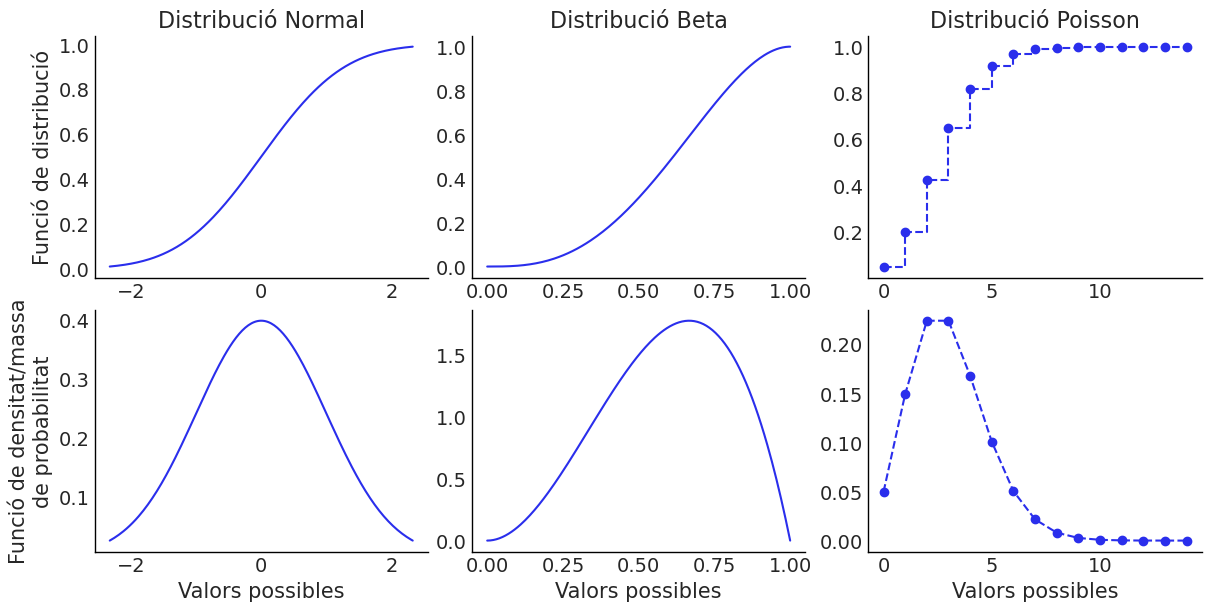

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# normal
dist = stats.norm()
grid = np.linspace(*dist.ppf([0.01, 0.99]), 200)
ax = axes[0, 0]
ax.plot(grid, dist.cdf(grid))
ax.set_title("Distribució Normal")
ax.set_ylabel("Funció de distribució")

ax = axes[1, 0]
ax.plot(grid, dist.pdf(grid))
ax.set_ylabel("Funció de densitat/massa\nde probabilitat")
ax.set_xlabel("Valors possibles")

# beta
dist = stats.beta(a=3, b=2)
grid = np.linspace(0, 1, 200)
ax = axes[0, 1]
ax.plot(grid, dist.cdf(grid))
ax.set_title("Distribució Beta")

ax = axes[1, 1]
ax.plot(grid, dist.pdf(grid))
ax.set_xlabel("Valors possibles")

# poisson
dist = stats.poisson(3)
grid = np.arange(15)
ax = axes[0, 2]
ax.plot(grid, dist.cdf(grid), "o--", drawstyle="steps-post")
ax.set_title("Distribució Poisson")

ax = axes[1, 2]
ax.plot(grid, dist.pmf(grid), "o--")
ax.set_xlabel("Valors possibles");

fig.savefig("variable_aleatoria_mates.png", dpi=300)

## Introducció general a models probabilistics, a nivell de context principalment

La xerrada no és sobre modelització probabilistica ni inferència, per tant no entrarem gens en detall, és un apunt principalment a nivell de motivació.

Els models probabilistics són aquells que tracten alguns dels seus paràmetres o observacions com a variables aleatòries enlloc de quantitats fixes/deterministiques.
El seu objectiu per tant no és trobar un valor pels paràmetres o fer prediccions numèriques, sinó obtenir les funcions de distribució o equivalents.

A la pràctica però, gairebé mai es possible obtenir les funcions de distribució com a _funcions_, sinó que només podem obtenir mostres generades per la distribució objectiu sense conèixer-la directament a través de diferents mètodes com ara Monte Carlo.

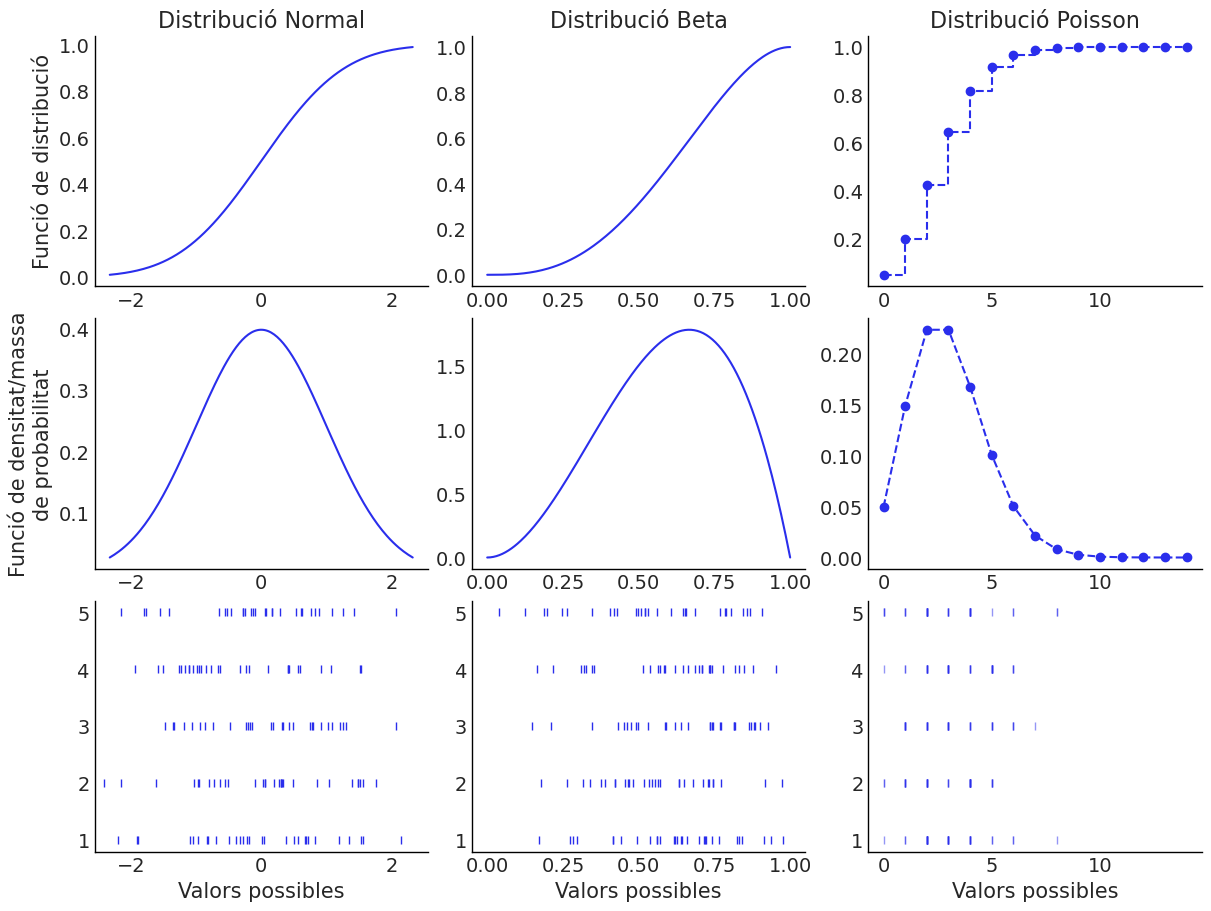

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

# normal
dist = stats.norm()
grid = np.linspace(*dist.ppf([0.01, 0.99]), 200)
ax = axes[0, 0]
ax.plot(grid, dist.cdf(grid))
ax.set_title("Distribució Normal")
ax.set_ylabel("Funció de distribució")

ax = axes[1, 0]
ax.plot(grid, dist.pdf(grid))
ax.set_ylabel("Funció de densitat/massa\nde probabilitat")

ax = axes[2, 0]
for i in range(5):
    ax.plot(dist.rvs(size=30), np.full(30, i+1), "|", color="C0")
ax.set_xlim(*axes[0, 0].get_xlim())
ax.set_xlabel("Mostres generades")
ax.set_xlabel("Valors possibles")

# beta
dist = stats.beta(a=3, b=2)
grid = np.linspace(0, 1, 200)
ax = axes[0, 1]
ax.plot(grid, dist.cdf(grid))
ax.set_title("Distribució Beta")

ax = axes[1, 1]
ax.plot(grid, dist.pdf(grid))

ax = axes[2, 1]
for i in range(5):
    ax.plot(dist.rvs(size=30), np.full(30, i+1), "|", color="C0")
ax.set_xlim(*axes[0, 1].get_xlim())
ax.set_xlabel("Mostres generades")
ax.set_xlabel("Valors possibles")

# poisson
dist = stats.poisson(3)
grid = np.arange(15)
ax = axes[0, 2]
ax.plot(grid, dist.cdf(grid), "o--", drawstyle="steps-post")
ax.set_title("Distribució Poisson")

ax = axes[1, 2]
ax.plot(grid, dist.pmf(grid), "o--")

ax = axes[2, 2]
for i in range(5):
    ax.plot(dist.rvs(size=30), np.full(30, i+1), "|", color="C0", alpha=0.5)
ax.set_xlim(*axes[0, 2].get_xlim())
ax.set_xlabel("Mostres generades")
ax.set_xlabel("Valors possibles");

fig.savefig("variable_aleatoria_practica.png", dpi=300)

## Introducció general a visualització de dades

Sigui perquè tenim resultats experimentals o perquè tenim resultats de models probabilístics, és molt habitual trobar-nos amb mostres d'una distribució desconeguda i haver de visualitzar-les per intentar tenir una idea de la distribució que les hagi pogut generar, poder veure quins valors són més probables, llegir probabilitats d'obtenir valors menors a una referència...

Visualitzar les dades és molt útil ja que ens permet codificar molta informació en poc espai i llegir-la de manera molt eficient.

Ara bé, la visualització de dades és una tasca complicada perquè no hi ha solucions generals sinó que la visualització adient per a cada situació i públic pot ser diferent. Avui veurem 4 gràfics diferents per visualitzar variables aleatories a partir de mostres generades amb dos objectius principalment:

* Ampliar el ventall de gràfics que coneixeu
* Aprofundir en el coneixement sobre aquests 4 gràfics per tal que us sentiu còmodes utilitzant-los.

## Gràfics que veurem

* Histograma
* estimadors nuclears de densitat (KDE)
* Funcions de distribució empíriques (ECDF)
* Gràfics de punts per quantils (dotplot)

In [6]:
plt.style.use('default')
mostres = np.random.default_rng(2).normal(size=200)

### Histograma

#### Decisions
* El nombre de classes o l'amplada dels intervals de classe

#### Computació

1. Escollir les classes
2. Contar quantes mostres cauen dins de cada classe

> animació de la computació d'un histograma

#### Com generar-lo amb ArviZ
[`plot_dist`](https://python.arviz.org/en/stable/api/generated/arviz.plot_dist.html) amb `kind="hist"`. Arguments d'interès:

* `hist_kwargs`: diccionari amb opcions per configurar l'histograma generat amb la funció [`hist` de matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html).

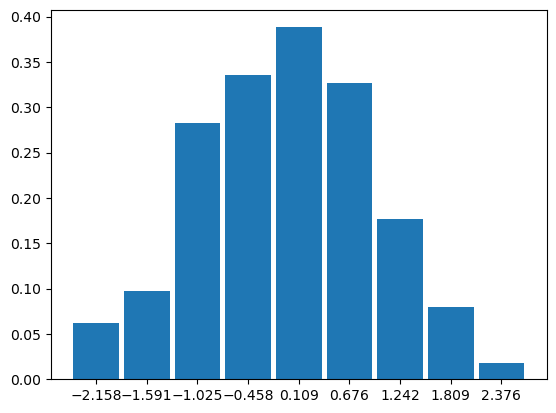

In [7]:
fig = plt.figure()
az.plot_dist(mostres, kind="hist");
fig.savefig("hist_base.png", dpi=300)

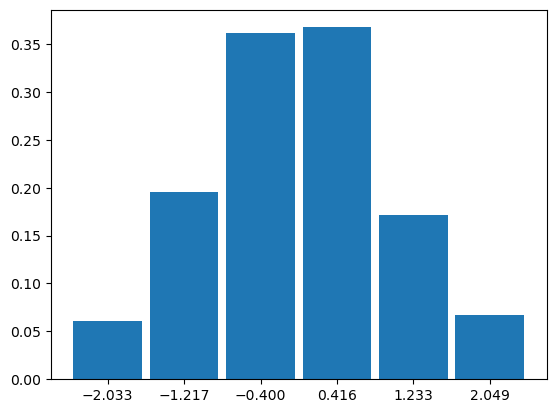

In [8]:
fig = plt.figure()
az.plot_dist(mostres, kind="hist", hist_kwargs={"bins": 6});
fig.savefig("hist_low_bins.png", dpi=300)

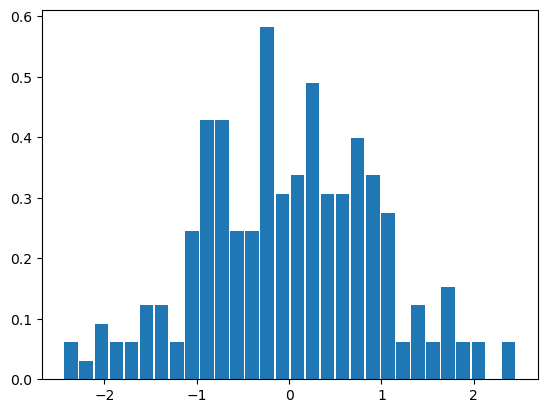

In [9]:
fig = plt.figure()
ax = az.plot_dist(mostres, kind="hist", hist_kwargs={"bins": 30})
ax.set_xticks(np.linspace(-2, 2, 5));
fig.savefig("hist_high_bins.png", dpi=300)

### Estimador nuclear de densitat (KDE)
En anglès _Kernel Density Estimate_.

#### Decisions
* El nucli
  - El més comú amb diferència és utilitzar un nucli gaussià, per tant  
* L'amplada de banda (i/o altres paràmetres del nucli)

#### Computació

1. Escollir l'amplada de banda
2. Calcular la contribució del nucli per a cada punt i sumar-les totes
3. (opcional) Calcular la correcció de frontera

> animació de la computació d'un kde

#### Com generar-lo amb ArviZ
[`plot_kde`](https://python.arviz.org/en/stable/api/generated/arviz.plot_kde.html). Arguments d'interès:

* `bw` valor real per a l'amplada de banda o cadena de text amb alguna de les opcions per indicar algoritmes predefinits per calcular l'amplada de banda.
* `adaptive` booleà indicant si mantenir l'amplada de banda constant o adaptarla segons la regió de la distribució

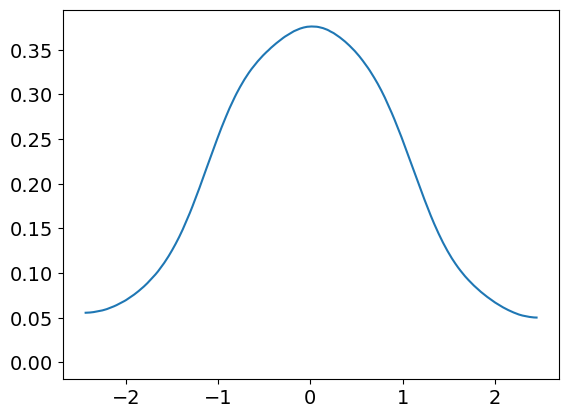

In [10]:
fig = plt.figure()
az.plot_kde(mostres);
fig.savefig("kde_base.png", dpi=300)

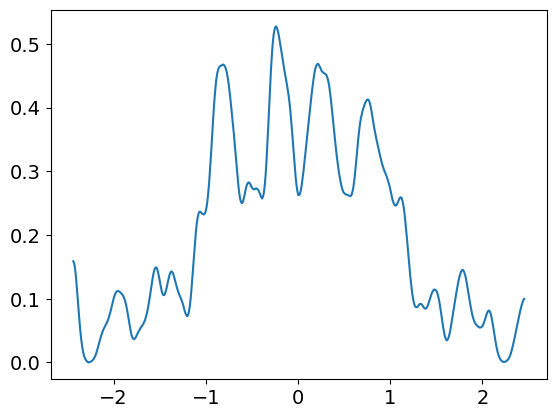

In [11]:
fig = plt.figure()
az.plot_kde(mostres, bw=0.05);
fig.savefig("kde_small_bw.png")

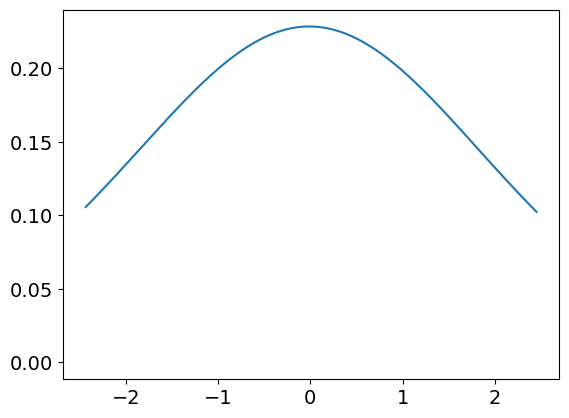

In [12]:
fig = plt.figure()
az.plot_kde(mostres, bw=1.5);
fig.savefig("kde_big_bw.png")

### Gràfic de punts per quantils

#### Decisions
* Nombre de punts

Important: Hi ha molts altres paràmetres estètics, que canvien significativament la forma del gràfic, però no modifiquen la seva lectura, que consisteix en contar punts.
La mida dels punts, si se solapen... no afecta a la lectura. El més exagerat és l'amplada de classe, que si es massa petit converteix el gràfic en un seguit de punts
arran del zero sense cap punt apilat, però s'interpreta igual.

#### Computació

1. Escollir l'amplada de classe i el nombre de punts
2. Calcular tants quantils com punts es vulguin. Els quantils es calculen equiespaiats entre 0 i 1 (cap dels dos inclosos)
3. Començant per l'esquerra:
   - Mirar quants quantils queden dins de l'interval `quantil_actual + amplada_de_classe`.
   - Escollir la x per als punts com a `(quantil_actual + ultim_quantil_interval) / 2`.
   - Apilar tants punts com quantils haguem trobat dins l'interval
   - Repetir el procés considerant el quantil actual com al primer quantil _fora_ de l'interval 

> animació de la computació d'un dotplot

#### Com generar-lo amb ArviZ
[`plot_dot`](https://python.arviz.org/en/stable/api/generated/arviz.plot_dot.html). Arguments d'interès:

* `nquantiles` valor enter que indica el nombre de punts pel gràfic generat
* `binwidth` valor real que indica l'amplada de classe
* `dotsize` valor real que indica el ratio entre la mida dels punts i el `binwidth`
* `stackratio` valor real que indica la distància entre punts apilats

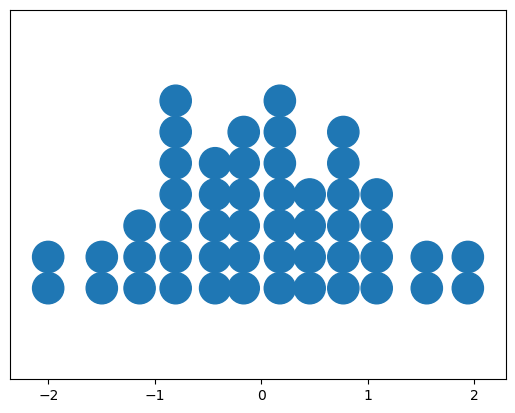

In [14]:
fig = plt.figure()
az.plot_dot(mostres);
fig.savefig("dot_base.png", dpi=300)

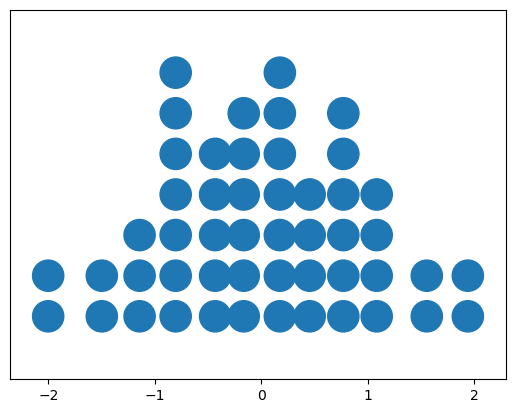

In [15]:
fig = plt.figure()
az.plot_dot(mostres, stackratio=1.3);
fig.savefig("dot_stackratio.png", dpi=300)

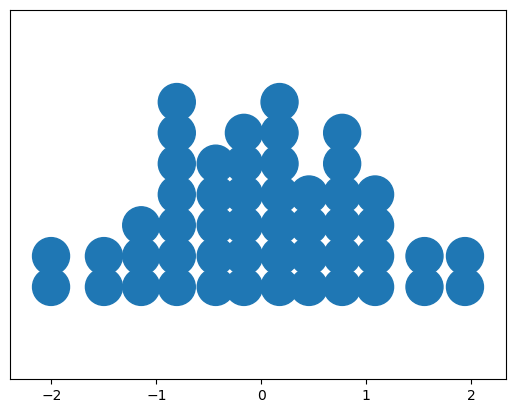

In [16]:
fig = plt.figure()
az.plot_dot(mostres, dotsize=1.2);
fig.savefig("dot_dotsize.png", dpi=300)

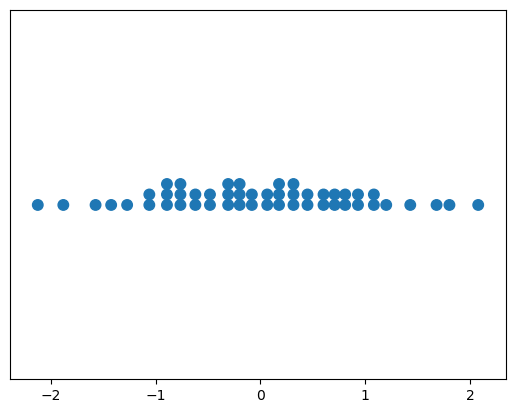

In [17]:
fig = plt.figure()
az.plot_dot(mostres, binwidth=0.1);
fig.savefig("dot_binwidth.png", dpi=300)

### Funció de distribució empírica (ECDF)
En anglès _Empirical Cumulative Density Function_.

#### Decisions
* Cap*

\* Especialment en cas de tenir moltes mostres, generar el gràfic amb totes elles pot ser costòs computacionalment i acabar en esglaons
massa seguits i baixos com per apreciar gaire res al gràfic. És possible generar la funció de distribució empirica evaluant-la en una quandrícula amb menys punts.
Si el nombre de punts en aquesta quadrícula és massa baix, el gràfic queda amb esglaons massa grans i es perd informació (acaba sent semblant a un histograma cumulatiu).
A diferència dels histogrames però, incrementant el nombre de punts de la malla no hi ha cap problema.

#### Computació

1. Ordenar les mostres
2. Començant per l'esquerra, anar gràficant els esglaons, incrementant la y en `1/numero_de_mostres` a cada mostra.

> animació de la computació d'un histograma

#### Com generar-lo amb ArviZ
[`plot_ecdf`](https://python.arviz.org/en/stable/api/generated/arviz.plot_ecdf.html). Arguments d'interès:

* `npoints` valor enter que indica el nombre de punts a la quadrícula on evaluar la funció de distribució empírica

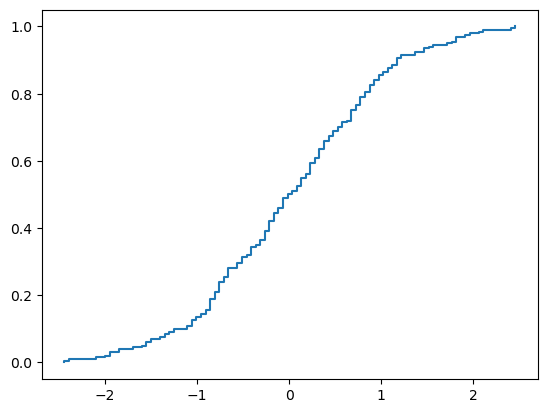

In [20]:
fig, ax = plt.subplots()
az.plot_ecdf(mostres, ax=ax);
fig.savefig("ecdf_base.png", dpi=300)

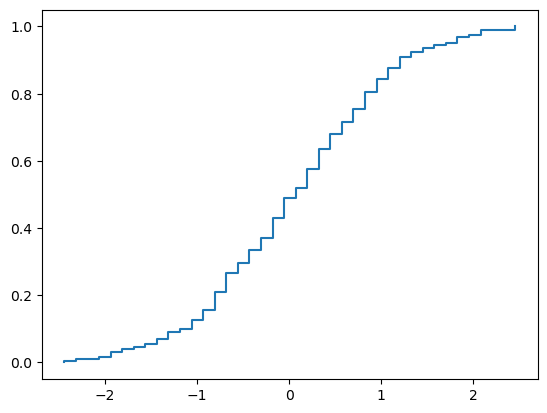

In [21]:
fig, ax = plt.subplots()
az.plot_ecdf(mostres, npoints=40, ax=ax);
fig.savefig("ecdf_npoints.png", dpi=300)

### Diagrama resum

In [26]:
az.style.use("arviz-white")
rng = np.random.default_rng(10)
samples = stats.skewnorm(3, loc=5, scale=2).rvs(size=50, random_state=rng)

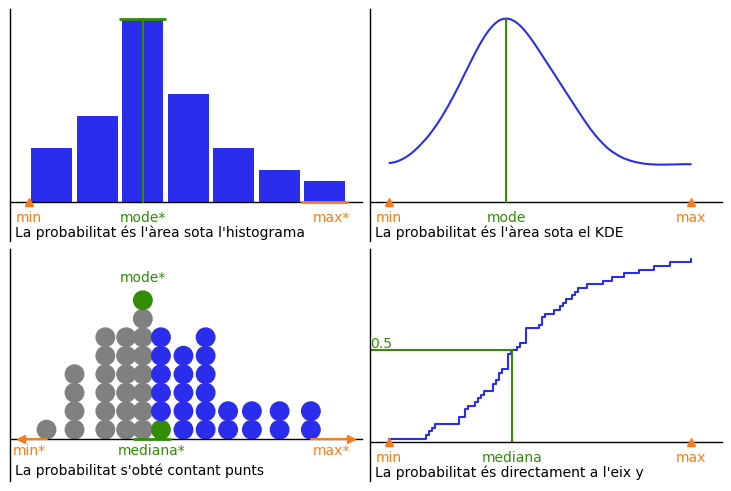

In [27]:
fig, axes = plt.subplots(2, 2)

################  HIST ###################
ax = axes[0, 0]
az.plot_dist(samples, kind="hist", ax=ax)
ax.tick_params(labelleft=False, labelbottom=False)
ax.set_xlim(3.5, 10)
ax.spines.bottom.set_position('zero')
ylim_top = ax.get_ylim()[1]
ax.set_ylim(- .2 * ylim_top, ylim_top)

bins = az.stats.density_utils.get_bins(samples)
hist, _ = np.histogram(samples, bins=bins, density=True)
ax.plot([samples.min()], [0], "^", color="C1", zorder=3)
ax.plot(bins[-2:], [0, 0], color="C1", zorder=3, linewidth=2)
ax.text(samples.min(), -0.1 * ylim_top, "min", color="C1", ha="center")
ax.text(samples.max(), -0.1 * ylim_top, "max*", color="C1", ha="center")
idx = np.argmax(hist)
mid = np.mean(bins[idx:idx+2])
ax.plot([bins[idx], bins[idx+1]], [hist[idx], hist[idx]], color="C2", linewidth=2, zorder=5)
ax.plot([mid, mid], [0, hist[idx]], color="C2", zorder=5)
ax.text(mid, -0.1 * ylim_top, "mode*", color="C2", ha="center")

ax.text(3.6, -0.19 * ylim_top, "La probabilitat és l'àrea sota l'histograma", color="k", ha="left", va="bottom")

################  KDE ###################
ax = axes[0, 1]
az.plot_kde(samples, ax=ax)
ax.tick_params(labelleft=False, labelbottom=False)
ax.set_xlim(3.5, 10)
ax.spines.bottom.set_position('zero')
ylim_top = ax.get_ylim()[1]
ax.set_ylim(- .2 * ylim_top, ylim_top)

ax.plot([samples.min(), samples.max()], [0, 0], "^", color="C1", zorder=3)
ax.text(samples.min(), -0.1 * ylim_top, "min", color="C1", ha="center")
ax.text(samples.max(), -0.1 * ylim_top, "max", color="C1", ha="center")
grid, kde = az.kde(samples)
idx = np.argmax(kde)
ax.plot([grid[idx], grid[idx]], [0, kde[idx]], color="C2", zorder=3)
ax.text(grid[idx], -0.1 * ylim_top, "mode", color="C2", ha="center")

ax.text(3.6, -0.19 * ylim_top, "La probabilitat és l'àrea sota el KDE", color="k", ha="left", va="bottom")

################  DOT ###################
ax = axes[1, 0]
az.plot_dot(samples, ax=ax)
ax.tick_params(labelleft=False, labelbottom=False)
ax.set_xlim(3.5, 10)
ax.spines.bottom.set_position('zero')
ylim_top = ax.get_ylim()[1]
ax.set_ylim(- .05 * ylim_top, ylim_top)


ndots = 50
qlist = np.linspace(1 / (2 * ndots), 1 - 1 / (2 * ndots), ndots)
values = np.quantile(samples, qlist)

binwidth = np.sqrt((values[-1] - values[0] + 1) ** 2 / (2 * ndots * np.pi))
radius = binwidth / 2

stack_locs, stack_count = az.plots.dotplot.wilkinson_algorithm(values, binwidth)
c_x, c_y = az.plots.dotplot.layout_stacks(stack_locs, stack_count, binwidth, 1, False)

qleft = values[0]
qright = np.mean(values[-2:])
ax.plot([3.7, qleft], [0, 0], color="C1", zorder=3)
ax.plot([3.7], [0], "<", color="C1", zorder=3)
ax.plot([qright, 9.8], [0, 0], color="C1", zorder=3)
ax.plot([9.8], [0], ">", color="C1", zorder=3)
ax.text(samples.min(), -0.1 * ylim_top, "min*", color="C1", ha="center")
ax.text(samples.max(), -0.1 * ylim_top, "max*", color="C1", ha="center")

# mode
ax.text(c_x[24], c_y[24]+binwidth, "mode*", color="C2", ha="center")

# median
dots = list(ax.patches)
for i, dot in enumerate(dots):
    if i in {24,25}:
        color = "C2"
    elif i > 25:
        color="C0"
    else:
        color = "gray"
    dot.set_color(color)
ax.plot([c_x[24]-radius, c_x[25]+radius], [0, 0], color="C2", zorder=3, linewidth=2)
ax.text(c_x[24]+radius, -0.1 * ylim_top, "mediana*", color="C2", ha="center")

ax.text(3.6, -0.25 * ylim_top, "La probabilitat s'obté contant punts", color="k", ha="left", va="bottom")

################  ECDF ###################1.865
ax = axes[1, 1]
az.plot_ecdf(samples, ax=ax)
ax.tick_params(labelleft=False, labelbottom=False)
ax.set_xlim(3.5, 10)
ax.spines.bottom.set_position('zero')
ylim_top = ax.get_ylim()[1]
ax.set_ylim(- .2 * ylim_top, ylim_top)

ax.plot([samples.min(), samples.max()], [0, 0], "^", color="C1", zorder=3)
ax.text(samples.min(), -0.1 * ylim_top, "min", color="C1", ha="center")
ax.text(samples.max(), -0.1 * ylim_top, "max", color="C1", ha="center")

ax.plot([3.5, np.median(samples)], [0.5, 0.5], color="C2")
ax.text(3.5, 0.5, "0.5", color="C2", ha="left", va="bottom")
ax.plot([np.median(samples), np.median(samples)], [0.5, 0], color="C2")
ax.text(np.median(samples), -0.1 * ylim_top, "mediana", color="C2", ha="center")

ax.text(3.6, -0.19 * ylim_top, "La probabilitat és directament a l'eix y", color="k", ha="left", va="bottom");

fig.savefig("diagrama_resum.png", dpi=300)

## Exemples: mans a l'obra!

In [238]:
def en_vertical(samples1, samples2):
    _, ax = plt.subplots(2, 4, figsize=(9, 5))
    az.plot_dist(samples1, kind="hist", ax=ax[0, 0])
    ax[0, 0].tick_params(axis='x', labelrotation=70)
    az.plot_kde(samples1, ax=ax[0, 1])
    az.plot_dot(samples1, ax=ax[0, 2])
    az.plot_ecdf(samples1, ax=ax[0, 3])
    
    az.plot_dist(samples2, kind="hist", ax=ax[1, 0])
    ax[1, 0].tick_params(axis='x', labelrotation=70)
    az.plot_kde(samples2, ax=ax[1, 1])
    az.plot_dot(samples2, ax=ax[1, 2])
    az.plot_ecdf(samples2, ax=ax[1, 3])

    left_lims = []
    right_lims = []
    for axes in ax.ravel()[1:]:
        left, right = axes.get_xlim()
        left_lims.append(left)
        right_lims.append(right)
    for axes in ax.ravel():
        axes.set_xlim(min(left_lims), max(right_lims))
    return axes

def sobreposades(samples1, samples2=None):
    _, ax = plt.subplots(1, 4, figsize=(12, 3))
    az.plot_dist(samples1, kind="hist", ax=ax[0], color="C1", hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
    az.plot_kde(samples1, ax=ax[1], plot_kwargs={"color": "C1"})
    az.plot_dot(samples1, ax=ax[2], plot_kwargs={"facecolor": "C1", "edgecolor": "none"})
    az.plot_ecdf(samples1, ax=ax[3], plot_kwargs={"color": "C1", "label": "1a mostra"})

    if samples2 is not None:
        az.plot_dist(samples2, kind="hist", ax=ax[0], color="C0", hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
        az.plot_kde(samples2, ax=ax[1], plot_kwargs={"color": "C0"})
        az.plot_dot(samples2, ax=ax[2], plot_kwargs={"facecolor": "none", "edgecolor": "C0"})
        az.plot_ecdf(samples2, ax=ax[3], plot_kwargs={"color": "C0", "label": "2a mostra"})

    for axes in ax.ravel()[1:]:
        axes.set_xlim(ax[0].get_xlim())
    ax[0].set_xticks(np.linspace(np.ceil(ax[0].get_xlim()[0]), np.floor(ax[0].get_xlim()[1]), 5))
    if samples2 is not None:
        ax[-1].legend(loc="upper left")
    return axes

def discreta(samples):
    _, ax = plt.subplots(1, 3, figsize=(9, 3))
    az.plot_dist(samples, ax=ax[0])
    az.plot_dot(samples, ax=ax[1])
    az.plot_ecdf(samples, ax=ax[2])

In [239]:
az.style.use("arviz-darkgrid")

### Esperant l'autobús

Estàs esperant l'autobús per tornar a casa després de fer encàrrecs. La parada està a uns 15 minuts de casa caminant.
Acaben d'actualitzar les pantalles a les parades i ara enlloc de donar un valor et permeten fer un gràfic d'incertesa
amb mostres dels temps d'arribada esperats segons el seu model probabilistic.

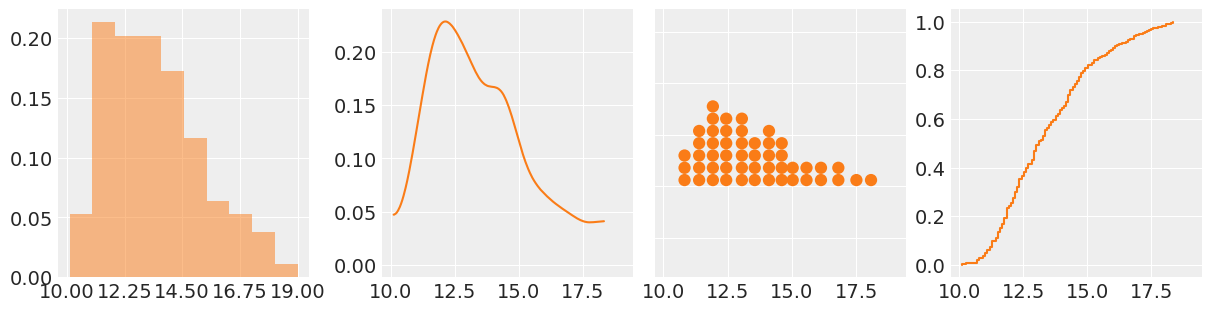

In [240]:
temps = stats.skewnorm(7, loc=11, scale=3).rvs(size=300, random_state=106)

sobreposades(temps);

### Seure a l'autobús

Mateixa situació que l'anterior, però amb més dades disponibles. A més del temps que trigarà en arribar, també pots generar gràfics
de la gent que hi haurà a l'autobús quan arribi. A la parada de moment hi ha 3 persones més esperant, i l'autobús té 37 seients i un aforament màxim
de 136 places.

In [241]:
import preliz as pz

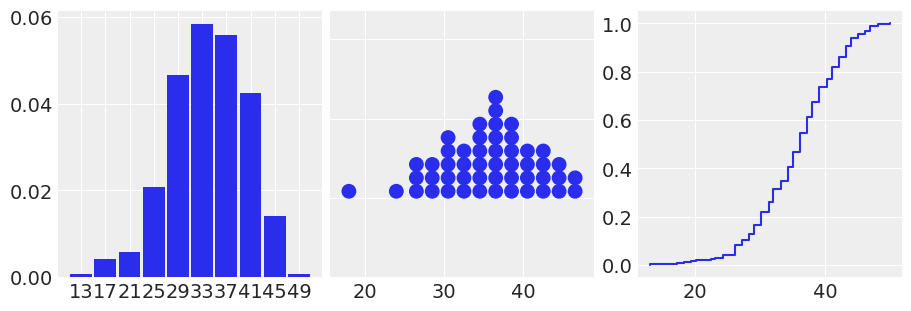

In [242]:
places = pz.BetaBinomial(alpha=13, beta=5.4, n=50).rvs(size=300, random_state=106)

discreta(places)

### V5 o V7?

Encara una altra situació similar. Us trobeu en un punt intermedi entre dues parades de bus, una del V5 i una altra del V7.
Voleu anar a un altre punt que també és intermedi entre tots dos. Quin d'ells agafarieu?

> Nota: conteu que triguen el mateix en fer el recorregut ja que les línies són aproximadament paral·leles.

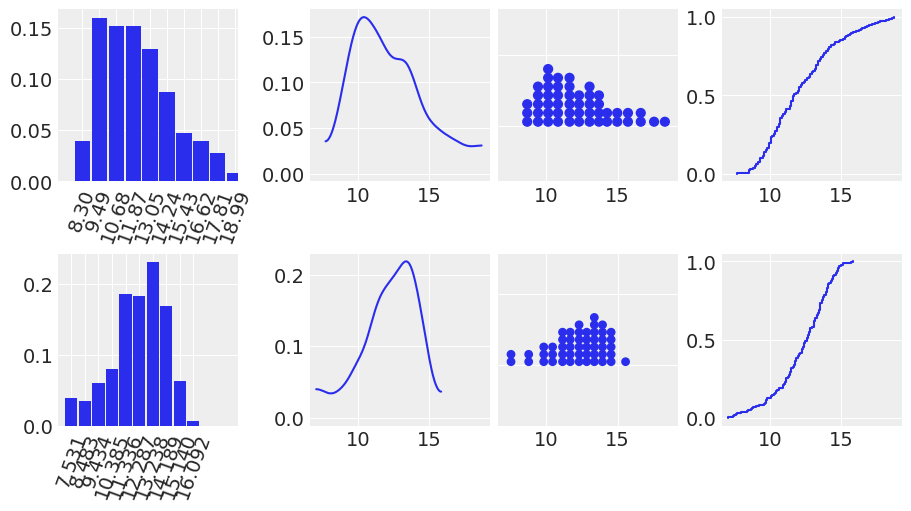

In [243]:
temps_v5 = stats.skewnorm(7, loc=8.9, scale=4).rvs(size=300, random_state=106)
temps_v7 = stats.skewnorm(-4, loc=14.6, scale=3).rvs(size=300, random_state=106)

en_vertical(temps_v5, temps_v7);

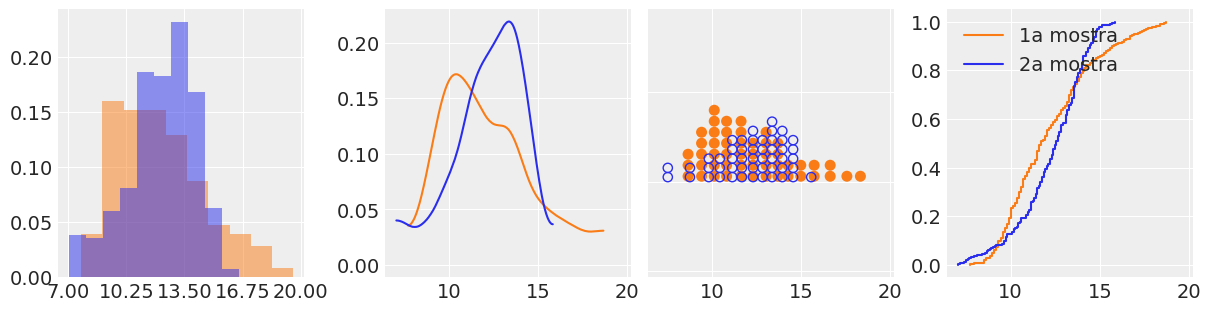

In [244]:
sobreposades(temps_v5, temps_v7);

In [245]:
import pandas as pd

In [246]:
df = pd.DataFrame.from_dict({"temps": temps, "places": places, "temps_v5": temps_v5, "temps_v7": temps_v7})
df.to_csv("dades_pydata.csv")